<h1>FIRST TASK</h1>

In [24]:
f = open('input.txt', 'r')
sentenses = list(map(lambda x: x.strip().lower(), f.readlines()))

sentenses

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

In [25]:
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'[a-z]+')

indexWords = list()
arrayOfDicts = list()

def addWordsToDict(sentense):
    dictionary = dict()
    
    words = tokenizer.tokenize(sentense)
    
    for word in words:
        if word in dictionary:
            dictionary[word] += 1
        else:
            dictionary[word] = 1
            
        if word not in indexWords:
            indexWords.append(word)
            
    arrayOfDicts.append(dictionary)


for sentense in sentenses:
    addWordsToDict(sentense)

    
print(indexWords)
print()
print(len(arrayOfDicts))

['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process', 'as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'concatenate', 'binary', 'files', 'where', 'will', 'just', 'sequence', 'a', 'common', 'interactive', 'use', 'for', 'single', 'file', 'is', 'output', 'content', 'standard', 'hear', 'sounds', 'too', 'faint', 'or', 'high', 'frequency', 'human', 'ears', 'such', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals', 'one', 'people', 'deliberately', 'tamed', 'artificial', 'selection', 'they', 'were', 'useful', 'predators', 'vermin', 'domesticated', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organisms', 'that', 'possess', 'chromosomes', 'roughly', 'genes', 'domestic', 'similar', 'size', 'members', 'genus', 'felis', 'typically', 'weighing', 'between', 'kg', 'lb', 'however', 'if', 'piped', 'redirected', 'unnecessary', 'with', 'named

In [26]:
import numpy as np

result = []

for dictionary in arrayOfDicts:
    resultArray = []

    for word in indexWords:
        count = 0

        if word in dictionary:
            resultArray.append(dictionary[word])
        else:
            resultArray.append(0)

    result.append(resultArray)


matrix = np.array(result)

print(matrix)
print()
print(matrix.shape)


[[1 1 1 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 1 ... 1 1 1]]

(22, 254)


In [27]:
matrix.shape[0]

22

In [138]:
from scipy.spatial import distance

cosine = []

for i in range(1, matrix.shape[0] - 1):
    cos = distance.cosine(matrix[0], matrix[i])
    cosine.append(cos)
    print(cos, i)

0.9527544408738466 1
0.8644738145642124 2
0.8951715163278082 3
0.7770887149698589 4
0.9402385695332803 5
0.7327387580875756 6
0.9258750683338899 7
0.8842724875284311 8
0.9055088817476932 9
0.8328165362273942 10
0.8804771390665607 11
0.8396432548525454 12
0.8703592552895671 13
0.8740118423302576 14
0.9442721787424647 15
0.8406361854220809 16
0.956644501523794 17
0.9442721787424647 18
0.8885443574849294 19
0.8427572744917122 20


In [142]:
import heapq

minDistance = heapq.nsmallest(2, cosine)

first = cosine.index(minDistance[0]) + 1
second = cosine.index(minDistance[1]) + 1

print(first)
print(second)


6
4


In [143]:
f = open('output.txt', 'w')
f.write(str(second) + ' ' + str(first))
f.close()

<h1>SECOND TASK</h1>

In [113]:
import math
import matplotlib.pyplot as plt
from scipy.linalg import solve

def hard(x):
    return math.sin(x / 5.) * math.exp(x / 10.) + 5. * math.exp(-x / 2.)

def degree(x, array):
    array = array[::-1]
    result = array[0]
    degree = 1
    
    for w in array[1:]:
        result += w * (x ** degree)
        degree += 1
    
    return result
    

In [114]:
a = np.array([[1, 1], [15, 1]])
b = np.array([hard(1), hard(15)])

print('matrix', a)
print('vector', b)
W_i = solve(a, b)
print('coeff', W_i)

valueHard = []
valueLinear = []

for i in range(1, 18):
    valueHard.append(hard(i))
    valueLinear.append(degree(i, W_i))

matrix [[ 1  1]
 [15  1]]
vector [3.25221687 0.63522142]
coeff [-0.18692825  3.43914511]


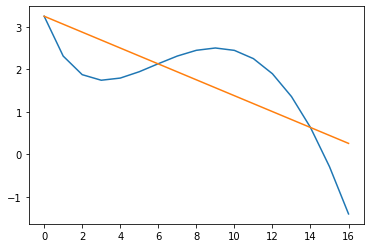

In [115]:
plt.plot(valueHard)
plt.plot(valueLinear)
plt.show()

In [116]:
a = np.array([[1, 1, 1], [64, 8, 1], [225, 15, 1]])
b = np.array([hard(1), hard(8), hard(15)])

print('matrix', a)
print('vector', b)
W_i = solve(a, b)
print('coeff', W_i)

valueHard = []
valueLinear = []

for i in range(1, 18):
    valueHard.append(hard(i))
    valueLinear.append(degree(i, W_i))

matrix [[  1   1   1]
 [ 64   8   1]
 [225  15   1]]
vector [3.25221687 2.31617016 0.63522142]
coeff [-0.00760104 -0.06531159  3.32512949]


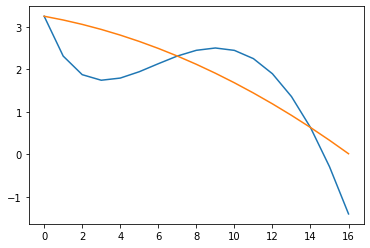

In [117]:
plt.plot(valueHard)
plt.plot(valueLinear)
plt.show()

In [121]:
a = np.array([[1, 1, 1, 1], [64, 16, 4, 1], [1000, 100, 10, 1], [3375, 225, 15, 1]])
b = np.array([hard(1), hard(4), hard(10), hard(15)])

print('matrix', a)
print('vector', b)
W_i = solve(a, b)
print('coeff', W_i)

valueHard = []
valueLinear = []

for i in range(1, 18):
    valueHard.append(hard(i))
    valueLinear.append(degree(i, W_i))

matrix [[   1    1    1    1]
 [  64   16    4    1]
 [1000  100   10    1]
 [3375  225   15    1]]
vector [3.25221687 1.74684595 2.50541641 0.63522142]
coeff [-0.00823565  0.19333685 -1.29552587  4.36264154]


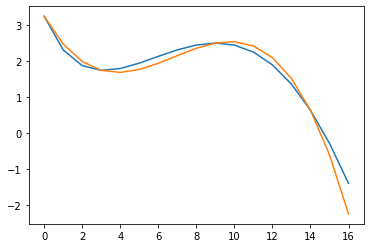

In [122]:
plt.plot(valueHard)
plt.plot(valueLinear)
plt.show()

In [126]:
f = open('output-2.txt', 'w')
f.write(' '.join(map(str, W_i[::-1].round(3))))
f.close()